In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [2]:
IMG_SHAPE  = 150

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('cats_and_dogs_filtered/train',
                                                 target_size = (IMG_SHAPE, IMG_SHAPE),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('cats_and_dogs_filtered/validation',
                                            target_size = (IMG_SHAPE, IMG_SHAPE),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [4]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[IMG_SHAPE, IMG_SHAPE, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

D:\apps\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

D:\apps\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - accuracy: 0.5235 - loss: 0.8195

D:\apps\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 491ms/step - accuracy: 0.5241 - loss: 0.8180 - val_accuracy: 0.6140 - val_loss: 0.6669
Epoch 2/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 450ms/step - accuracy: 0.5877 - loss: 0.6718 - val_accuracy: 0.5920 - val_loss: 0.6856
Epoch 3/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 454ms/step - accuracy: 0.6137 - loss: 0.6469 - val_accuracy: 0.6210 - val_loss: 0.6608
Epoch 4/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 464ms/step - accuracy: 0.6751 - loss: 0.6282 - val_accuracy: 0.5910 - val_loss: 0.6790
Epoch 5/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 452ms/step - accuracy: 0.6678 - loss: 0.6017 - val_accuracy: 0.6340 - val_loss: 0.6211
Epoch 6/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 576ms/step - accuracy: 0.7078 - loss: 0.5710 - val_accuracy: 0.7030 - val_loss: 0.5961
Epoch 7/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 537ms/step - accuracy: 0.7128 - loss: 0.5479 - val_accuracy: 0.7040 - val_loss: 0.5596
Epoch 8/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 612ms/step - accuracy: 0.7398 - loss: 0.5211 - val_accuracy: 0.698

<Axes: >

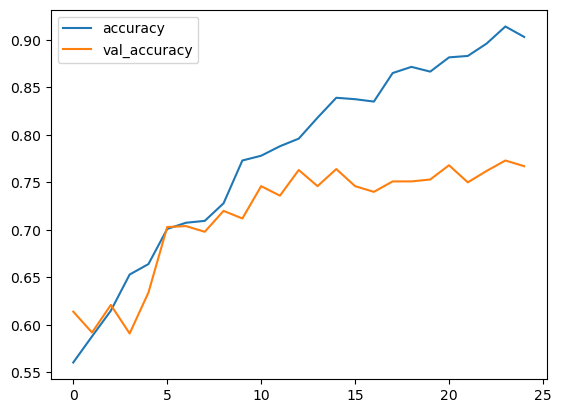

In [9]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

In [35]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

def predict(image_path):
    test_image = image.load_img(image_path, target_size = (IMG_SHAPE, IMG_SHAPE))
    plt.imshow(test_image)
    
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image)
    training_set.class_indices
    if result[0][0] == 1:
      prediction = 'dog'
    else:
      prediction = 'cat'
    
    print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
cat


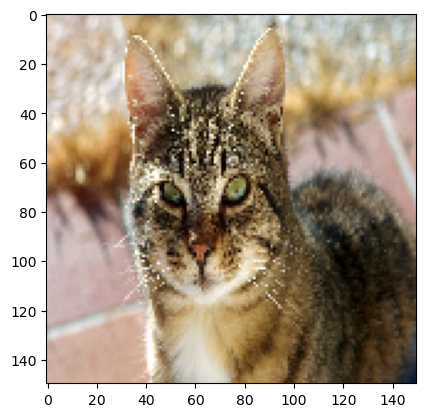

In [36]:
predict('cats_and_dogs_filtered/test/cat_or_dog1.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
cat


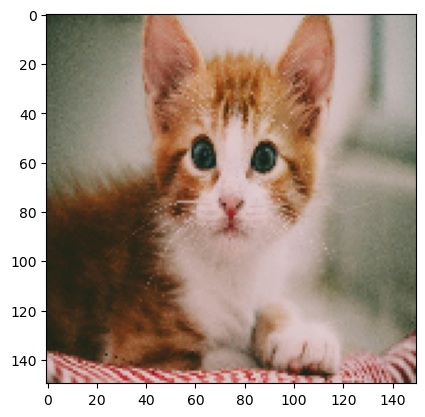

In [37]:
predict('cats_and_dogs_filtered/test/cat_or_dog2.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
dog


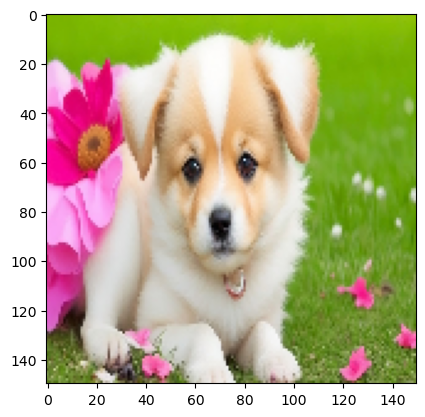

In [38]:
predict('cats_and_dogs_filtered/test/cat_or_dog3.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
dog


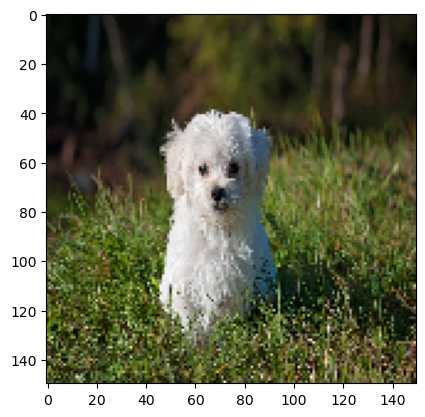

In [39]:
predict('cats_and_dogs_filtered/test/cat_or_dog4.jpg')

In [54]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [60]:
for k,v in training_set.class_indices.items():
    print(k,v)

cats 0
dogs 1
